k-Nearest Neighbors (KNN)

Implement the k-Nearest Neighbors (kNN) algorithm for 3 classes,
 
for example: 🍎 Apple, 🍌 Banana, 🍉 Watermelon.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 100
apple_width = np.random.normal(6, 1, n)
apple_length = np.random.normal(6, 1, n)
banana_width = np.random.normal(4, 1, n)
banana_length = np.random.normal(8, 1, n)
Watermelon_width = np.random.normal(10, 1, n)
Watermelon_length = np.random.normal(12, 1, n)

In [3]:
width = np.concatenate((apple_width, banana_width, Watermelon_width))
length = np.concatenate((apple_length, banana_length, Watermelon_length))

X_train = np.array([width, length]).T

In [4]:
Y_apples = np.zeros(n, dtype='int')
Y_banana = np.ones(n, dtype='int')
Y_Watermelon = np.ones(n, dtype='int')*2
Y_train = np.concatenate((Y_apples, Y_banana, Y_Watermelon))

In [7]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [8]:

k = 5
def myKNN(X_train, Y_train, k, X_test):
    distances = []
    for x in X_train:
        d = euclidean_distance(X_test, x)
        d = np.sqrt(np.sum((X_test-x)**2))
        distances.append(d)

    nearest_neighbors = np.argsort(distances)[0:k]
    result = np.bincount(Y_train[nearest_neighbors])
    return np.argmax(result), max(np.sort(distances)[0:k])

In [9]:
new_fruits = np.array([[5, 6],[5, 8],[4, 4],[9, 8],[7, 10],[4, 6],[2, 9],[6, 8],[12, 11],[11, 8]])
results = []
for new_fruit in new_fruits:
    result, destance = myKNN(X_train, Y_train, k, new_fruit)
    results.append([result, destance])

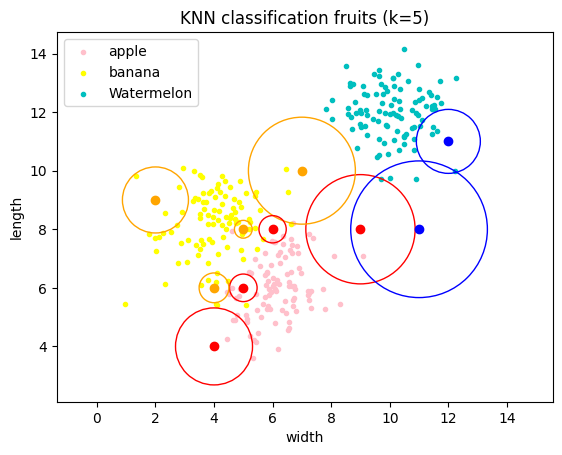

In [11]:
fig, ax = plt.subplots()
plt.scatter(apple_width, apple_length, c = 'pink', marker='.')
plt.scatter(banana_width, banana_length, c = 'yellow', marker='.')
plt.scatter(Watermelon_width, Watermelon_length, c = 'c', marker='.')
for i in range(len(new_fruits)):
    if (results[i][0] == 1):
        color = 'orange'
    elif (results[i][0] == 0):
        color = 'red'
    else:
        color = 'blue'
    plt.scatter(new_fruits[i,0], new_fruits[i,1], c = color, marker='o')
    circle = plt.Circle((new_fruits[i,0], new_fruits[i,1]), results[i][1], color=color, fill=False)
    ax.add_patch(circle)
plt.axis('equal')
plt.title(f'KNN classification fruits (k={k})')
plt.xlabel('width')
plt.ylabel('length')
plt.legend(['apple','banana','Watermelon'])
plt.show()